이전 시간 복습
KNeighborsClassifier kn 객체
- fit() : 훈련
- score() : test
- predict() : 새로운 데이터가 주어졌을때 예측

<br>

## 지도 학습과 비지도 학습
 ### 지도학습
입력과 타겟이 있는 데이터를 사용하여 학습
- KNeighbors

### 비지도학습
타겟 데이터가 없고 입력만으로 학습

### 강화학습
모델이 어떤 행동을 수행한 후, 주변의 환경에 의해서 행동의 결과를 피드백받으며 개선해나간다. <br>
환경이 주는 보상(reward)을 최대화. 이 모델을 Agent라고 부르기도한다.
- AlphaGO





## 훈련 세트와 테스트 세트
### 샘플 49개 중 훈련 세트 35개,테스트 세트 14개 - 샘플링 편향에 주의


fruit_length = [5.4, 6.3, 6.5, 9.0, 9.0, 9.7, 9.7, 10.0, 10.0, 10.7, 11.0, 11.0, 11.5, 12.0, 12.0, 12.0, 13.0, 13.0, 13.5, 13.5,
                14.0,14.0, 14.5, 1.8, 2.5, 2.6, 2.0, 2.2, 2.3, 2.8, 2.8, 2.0, 2.2, 2.4, 2.0]
fruit_weight = [24.0, 29.0, 34.0, 36.0, 43.0, 45.0, 50.0, 49.0, 45.0, 50.0, 47.0, 50.0, 50.0, 44.0, 60.0, 60.0, 70.0, 70.0, 61.0, 65.0, 
                57.0,68.0, 62.0, 1.7, 2.0, 2.0, 1.7, 2.8, 1.7, 2.1, 2.3, 1.8, 2.2, 1.9, 2.2]

test_length = [15.0, 15.0, 15.0, 15.0, 16.0, 16.0, 17.0, 18.5, 18.5, 19.5, 11.0, 11.0, 2.3, 2.0]
test_weight = [68.0, 70.0, 72.0, 72.0, 71.0, 85.0, 90.0, 92.0, 95.0, 92.0, 57.0, 55.0, 2.3, 1.9]

In [ ]:
fruit_length = [5.4, 6.3, 6.5, 9.0, 9.0, 9.7, 9.7, 10.0, 10.0, 10.7, 11.0, 11.0, 11.5, 12.0, 12.0, 12.0, 13.0, 13.0, 13.5, 13.5,
                14.0,14.0, 14.5, 15.0, 15.0, 15.0, 15.0, 16.0, 16.0, 17.0, 18.5, 18.5, 19.5, 11.0, 11.0
                , 1.8, 2.5, 2.6, 2.0, 2.2, 2.3, 2.8, 2.8, 2.0, 2.2, 2.4, 2.0, 2.3, 2.0]
fruit_weight = [24.0, 29.0, 34.0, 36.0, 43.0, 45.0, 50.0, 49.0, 45.0, 50.0, 47.0, 50.0, 50.0, 44.0, 60.0, 60.0, 70.0, 70.0, 61.0, 65.0, 
                57.0,68.0, 62.0, 68.0, 70.0, 72.0, 72.0, 71.0, 85.0, 90.0, 92.0, 95.0, 92.0, 57.0, 55.0
                ,1.7, 2.0, 2.0, 1.7, 2.8, 1.7, 2.1, 2.3, 1.8, 2.2, 1.9, 2.2, 2.3, 1.9]

In [ ]:
fruit_data = [[l,w] for l,w in zip(fruit_length,fruit_weight)]
fruit_target = [1]*35 + [0]*14 # 35개의 훈련 세트, 14개의 test 세트

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

kn  = KNeighborsClassifier()

In [ ]:
print(fruit_data[4])

[9.0, 43.0]


In [ ]:
print(fruit_data[:5])

[[5.4, 24.0], [6.3, 29.0], [6.5, 34.0], [9.0, 36.0], [9.0, 43.0]]


In [ ]:
print(fruit_data[44:])

[[2.2, 2.2], [2.4, 1.9], [2.0, 2.2], [2.3, 2.3], [2.0, 1.9]]


In [ ]:
train_input = fruit_data[:35] # 샘플링 편향
train_target = fruit_target[:35]

test_input = fruit_data[35:]
test_target = fruit_target[35:]

In [ ]:
kn = kn.fit(train_input,train_target)
kn.score(test_input,test_target)

0.0

0.0이 나올 수 밖에 없다. train은 사과 데이터만 주고 test는 자두 데이터로 했기때문이다.

**샘플링 편향**을 방지하기 위해서는 데이터를 적절히 섞어주는 것이 필요하다 -> Numpy 이용

## **넘파이**

In [ ]:
import numpy as np

In [ ]:
input_arr = np.array(fruit_data)
target_arr = np.array(fruit_target)

In [ ]:
print(input_arr)

[[ 5.4 24. ]
 [ 6.3 29. ]
 [ 6.5 34. ]
 [ 9.  36. ]
 [ 9.  43. ]
 [ 9.7 45. ]
 [ 9.7 50. ]
 [10.  49. ]
 [10.  45. ]
 [10.7 50. ]
 [11.  47. ]
 [11.  50. ]
 [11.5 50. ]
 [12.  44. ]
 [12.  60. ]
 [12.  60. ]
 [13.  70. ]
 [13.  70. ]
 [13.5 61. ]
 [13.5 65. ]
 [14.  57. ]
 [14.  68. ]
 [14.5 62. ]
 [15.  68. ]
 [15.  70. ]
 [15.  72. ]
 [15.  72. ]
 [16.  71. ]
 [16.  85. ]
 [17.  90. ]
 [18.5 92. ]
 [18.5 95. ]
 [19.5 92. ]
 [11.  57. ]
 [11.  55. ]
 [ 1.8  1.7]
 [ 2.5  2. ]
 [ 2.6  2. ]
 [ 2.   1.7]
 [ 2.2  2.8]
 [ 2.3  1.7]
 [ 2.8  2.1]
 [ 2.8  2.3]
 [ 2.   1.8]
 [ 2.2  2.2]
 [ 2.4  1.9]
 [ 2.   2.2]
 [ 2.3  2.3]
 [ 2.   1.9]]


In [ ]:
print(input_arr.shape)

(49, 2)


In [ ]:
# 난수를 예측 가능하도록 만든다. 난수가 발생하는 동작 제어
np.random.seed(42)
index = np.arange(49) # 0~48 인덱스를 생성한다.
np.random.shuffle(index) # 인덱스를 섞어준다.

In [ ]:
print(index)

[13 45 47 44 17 27 26 25 31 19 12  4 34  8  3  6 40 41 46 15  9 16 24 33
 30  0 43 32  5 29 11 36  1 21  2 37 35 23 39 10 22 18 48 20  7 42 14 28
 38]


In [ ]:
print(input_arr[[1,3]])

[[ 6.3 29. ]
 [ 9.  36. ]]


In [ ]:
train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]

In [ ]:
print(input_arr[13],train_input[0]) # shuffle 확인

[12. 44.] [12. 44.]


In [ ]:
test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

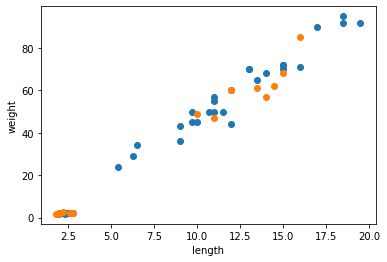

In [ ]:
import matplotlib.pyplot as plt

# 2차원 배열의 행과 열을 선택
plt.scatter(train_input[:,0],train_input[:,1])
plt.scatter(test_input[:,0],test_input[:,1])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

## 두 번째 머신러닝 프로그램

In [ ]:
kn = kn.fit(train_input,train_target)

In [ ]:
kn.score(test_input,test_target)

1.0

In [ ]:
kn.predict(test_input)

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

In [ ]:
test_target

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])